# Volatility
- volatility is a numerical representaion of how much the market moves, a higher vol means the  martet moves more  (up or down)



## Normal Dist

In [2]:
from numpy import random

x = random.normal(size=(5))

print(x)

[ 0.75090636 -1.90722457  0.16803625  1.62060404  0.45244279]


In [3]:
import matplotlib.pyplot as plt

if I fliped a coin 15 times and counted how many heads I got and did that 100 times it would  look like a normal dist

(array([1., 2., 1., 0., 3., 4., 0., 1., 2., 1.]),
 array([ 4. ,  4.7,  5.4,  6.1,  6.8,  7.5,  8.2,  8.9,  9.6, 10.3, 11. ]),
 <BarContainer object of 10 artists>)

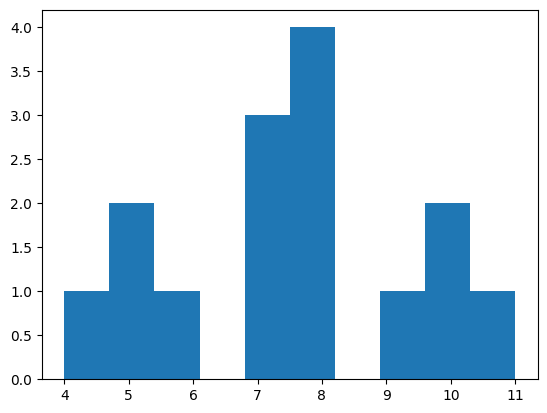

In [20]:
# this does not look normal because we did not have enough data
import numpy as np
x = random.uniform(size=(15,15))
x = np.where(x>.5,1,0)
plt.hist(np.sum(x,axis=1))

(array([ 2.,  3.,  8., 18., 18., 18., 12., 14.,  4.,  3.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 10 artists>)

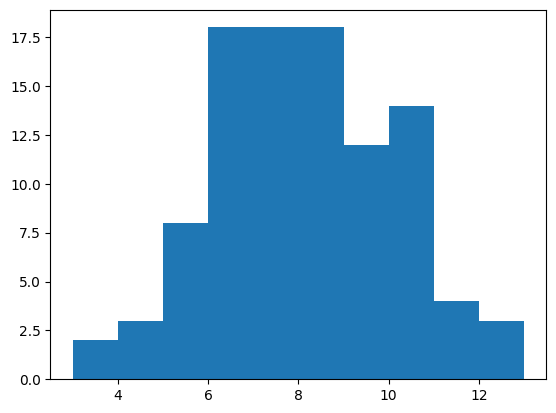

In [30]:
# now that we increaed the numbere of times we flipped the  coin 15 times it look more  normal
x = random.uniform(size=(100,15))
x = np.where(x>.5,1,0)
plt.hist(np.sum(x,axis=1))

(array([ 15.,  44.,  73., 140., 182., 204., 167., 110.,  46.,  19.]),
 array([ 2. ,  3.1,  4.2,  5.3,  6.4,  7.5,  8.6,  9.7, 10.8, 11.9, 13. ]),
 <BarContainer object of 10 artists>)

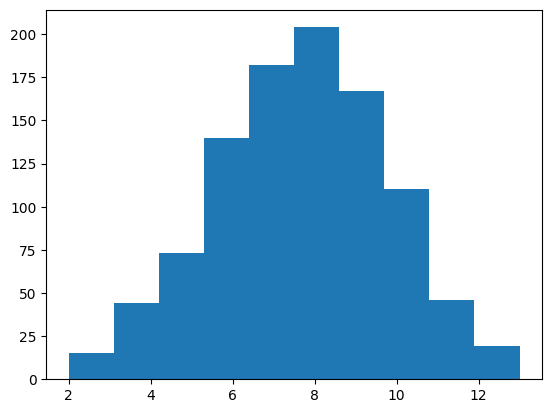

In [28]:
x = random.uniform(size=(1000,15))
x = np.where(x>.5,1,0)
plt.hist(np.sum(x,axis=1))

 high vs low vol

(array([  1.,   4.,  27.,  97., 194., 269., 246., 130.,  28.,   4.]),
 array([-0.42442443, -0.34983881, -0.27525319, -0.20066757, -0.12608195,
        -0.05149633,  0.02308929,  0.09767491,  0.17226053,  0.24684616,
         0.32143178]),
 <BarContainer object of 10 artists>)

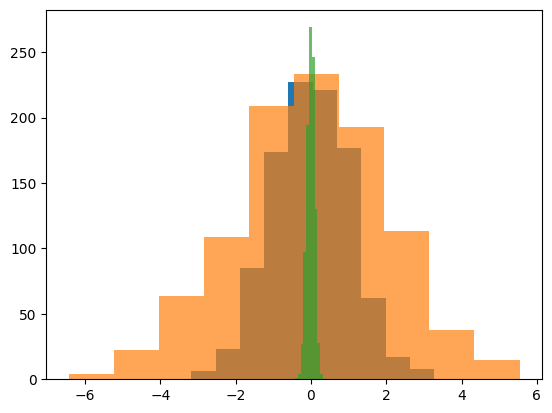

In [48]:
# blue
x = random.normal(0,1,size=(1000))
plt.hist(x)

# Orange
x_high = random.normal(0,2,size=(1000))
plt.hist(x_high, alpha=0.7)

# Green
x_low = random.normal(0,.1,size=(1000))
plt.hist(x_low, alpha=0.7)


## mean std

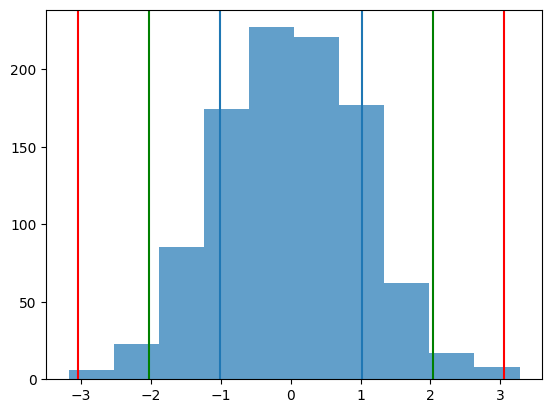

In [59]:
plt.hist(x, alpha=.7)
# 1 std, 68% is between 1 std
plt.axvline(x=np.mean(x) + np.std(x))
plt.axvline(x=np.mean(x) - np.std(x))

plt.axvline(x=np.mean(x) + 2*np.std(x),color = 'green')
plt.axvline(x=np.mean(x) - 2*np.std(x),color = 'green')

plt.axvline(x=np.mean(x) + 3*np.std(x),color = 'red')
plt.axvline(x=np.mean(x) - 3*np.std(x),color = 'red')



## relized vol 

In [74]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get historical market data
hist = msft.history(period="1y")

In [77]:
import numpy as np
r_vol = hist['Close'].pct_change().std() * np.sqrt(252)

In [78]:
r_vol

0.28018337327923176

## implied vol

In [89]:
! pip install prophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 27.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 306.3 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [90]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ds
Date,,,,,,,,
2022-11-03 00:00:00-04:00,217.984115,218.301060,211.932576,212.199997,36633900,0.0,0.0,2022-11-03 00:00:00-04:00
2022-11-04 00:00:00-04:00,215.468398,219.469736,211.387810,219.271652,36789100,0.0,0.0,2022-11-04 00:00:00-04:00
2022-11-07 00:00:00-05:00,219.865924,226.224493,219.162711,225.689651,33498000,0.0,0.0,2022-11-07 00:00:00-05:00
2022-11-08 00:00:00-05:00,226.511697,229.433468,223.679063,226.680069,28192500,0.0,0.0,2022-11-08 00:00:00-05:00
2022-11-09 00:00:00-05:00,225.194436,226.442390,222.183531,222.361801,27852900,0.0,0.0,2022-11-09 00:00:00-05:00
...,...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,330.429993,336.720001,328.399994,329.809998,29856500,0.0,0.0,2023-10-27 00:00:00-04:00
2023-10-30 00:00:00-04:00,333.410004,339.450012,331.829987,337.309998,22828100,0.0,0.0,2023-10-30 00:00:00-04:00
2023-10-31 00:00:00-04:00,338.850006,339.000000,334.690002,338.109985,20265300,0.0,0.0,2023-10-31 00:00:00-04:00


In [91]:
import pandas as pd
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [93]:
hist['y'] = hist['Close'].pct_change().rolling(5).std() * np.sqrt(252)

In [95]:
hist['ds'].dt

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ds,5_d_vol,y
Date,,,,,,,,,,
2022-11-03 00:00:00-04:00,217.984115,218.301060,211.932576,212.199997,36633900,0.0,0.0,2022-11-03 00:00:00-04:00,NaN,NaN
2022-11-04 00:00:00-04:00,215.468398,219.469736,211.387810,219.271652,36789100,0.0,0.0,2022-11-04 00:00:00-04:00,NaN,NaN
2022-11-07 00:00:00-05:00,219.865924,226.224493,219.162711,225.689651,33498000,0.0,0.0,2022-11-07 00:00:00-05:00,NaN,NaN
2022-11-08 00:00:00-05:00,226.511697,229.433468,223.679063,226.680069,28192500,0.0,0.0,2022-11-08 00:00:00-05:00,NaN,NaN
2022-11-09 00:00:00-05:00,225.194436,226.442390,222.183531,222.361801,27852900,0.0,0.0,2022-11-09 00:00:00-05:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-27 00:00:00-04:00,330.429993,336.720001,328.399994,329.809998,29856500,0.0,0.0,2023-10-27 00:00:00-04:00,0.391968,0.391968
2023-10-30 00:00:00-04:00,333.410004,339.450012,331.829987,337.309998,22828100,0.0,0.0,2023-10-30 00:00:00-04:00,0.418798,0.418798
2023-10-31 00:00:00-04:00,338.850006,339.000000,334.690002,338.109985,20265300,0.0,0.0,2023-10-31 00:00:00-04:00,0.419177,0.419177


21:52:50 - cmdstanpy - INFO - Chain [1] start processing
21:52:50 - cmdstanpy - INFO - Chain [1] done processing
/home/moe18/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/moe18/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


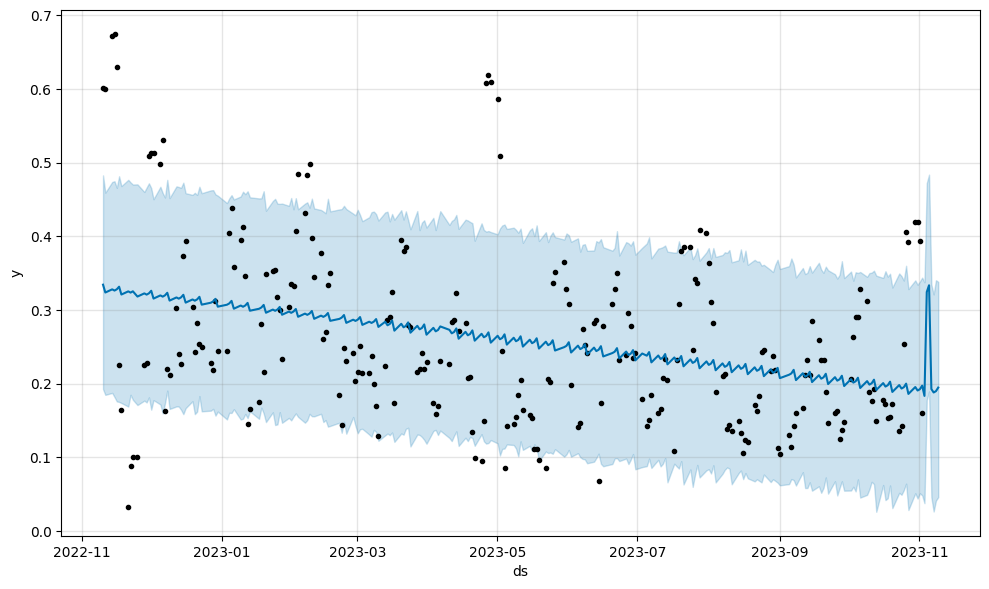

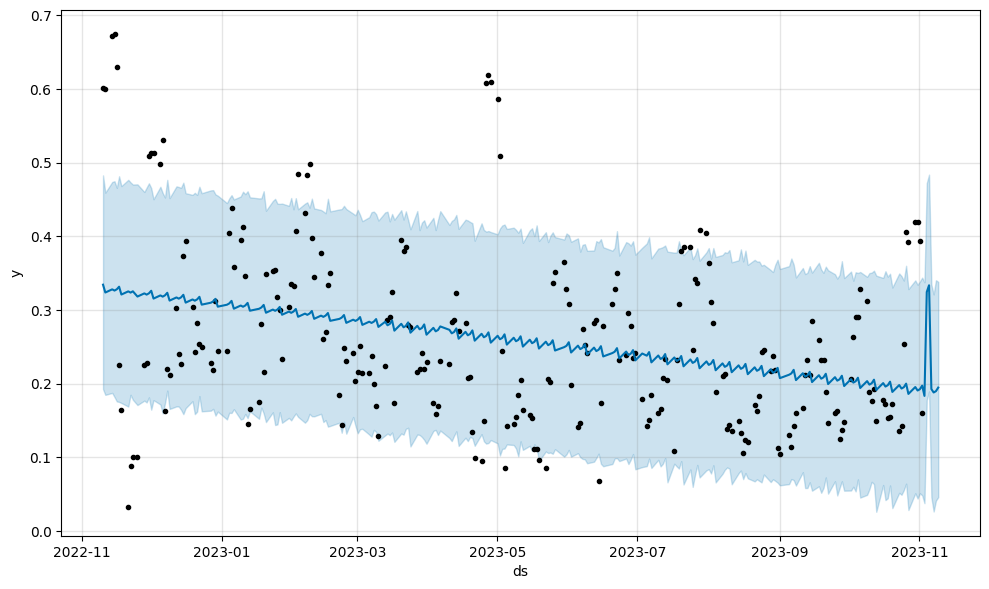

In [101]:
hist['ds'] = pd.to_datetime(hist.index)  # Ensure 'ds' column is in datetime format
hist['ds'] = hist['ds'].dt.tz_convert(None)
# Initialize and fit the model
model = Prophet()
model.fit(hist)

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=7)  # Forecasting for 365 days into the future

# Generate forecast
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

In [104]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
248,2023-11-05 04:00:00,0.229795,0.189351,0.483577,0.229795,0.229795,0.103631,0.103631,0.103631,0.103631,0.103631,0.103631,0.0,0.0,0.0,0.333426
249,2023-11-06 04:00:00,0.229413,0.045692,0.334447,0.229413,0.229413,-0.036763,-0.036763,-0.036763,-0.036763,-0.036763,-0.036763,0.0,0.0,0.0,0.192650
250,2023-11-07 04:00:00,0.229031,0.026408,0.321028,0.229030,0.229031,-0.041100,-0.041100,-0.041100,-0.041100,-0.041100,-0.041100,0.0,0.0,0.0,0.187931
251,2023-11-08 04:00:00,0.228649,0.041194,0.340278,0.228648,0.228649,-0.038931,-0.038931,-0.038931,-0.038931,-0.038931,-0.038931,0.0,0.0,0.0,0.189717
252,2023-11-09 04:00:00,0.228266,0.045842,0.338073,0.228265,0.228267,-0.033675,-0.033675,-0.033675,-0.033675,-0.033675,-0.033675,0.0,0.0,0.0,0.194591
